<a href="https://colab.research.google.com/github/valeriachipana/airlineCustomerSatisfactionAnalysis/blob/main/Predicci%C3%B3n_de_insatisfacci%C3%B3n_de_clientes_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 1. Definición del problema:
Un primer análisis exploratorio reveló que el 81.7% de los pasajeros son considerados leales, pero solo el 63.5% de ellos se muestra satisfecho con su experiencia de vuelo. Este desbalance evidencia una significativa oportunidad para identificar áreas de mejora, retener clientes leales, aumentar actualizaciones de clase y maximizar la satisfacción general.


Desarrollar un modelo de Machine Learning que permita predecir la insatisfacción de los clientes de una aerolínea a partir de datos de encuestas y características del vuelo, con el objetivo de apoyar decisiones de marketing y retención de clientes.

El modelo no solo permitirá anticipar la satisfacción del cliente, sino que también será una herramienta clave para implementar estrategias de comunicación/marketing personalizadas para cada segmento. Por ejemplo:
* **Clientes satisfechos:** Comunicaciones de fidelización, promociones exclusivas o incentivos para repetir su experiencia y/o hacer un upgrade de clase.
*	**Clientes insatisfechos:** Propuestas para mejorar su percepción, como descuentos, actualizaciones de clase o encuestas para identificar áreas específicas de mejora.

En consecuencia, se espera que aumentar la satisfacción general de los usuarios no solo se traduzca en un incremento de retención, conversión (actualizaciones de clase) e ingresos para la aerolínea, sino que también en una administración más eficiente de los recursos disponibles.


**Objetivos específicos**

* Desarrollar un modelo de Machine Learning capaz de predecir la satisfacción de los clientes utilizando los datos disponibles sobre características y atributos relevantes con la finalidad de identificar quienes requieren comunicaciones específicas (satisfechos e insatisfechos).

* Brindar al equipo de marketing una herramienta que facilite la segmentación y personalización de estrategias de comunicación. Esto permitirá segmentar a los clientes según su nivel de satisfacción para implementar acciones específicas, como descuentos, promociones o mejoras en la experiencia de vuelo, con el propósito de incrementar su satisfacción y fomentar futuras actualizaciones de clase.

**Acerca del dataset**

El dataset utilizado fue extraído de Kaggle ([Airlines Customer satisfaction](https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction?resource=download)) y contiene datos sobre los clientes de una aerolínea, características del vuelo y valoraciones sobre diversos aspectos del servicio obtenidos mediante encuestas de satisfacción.

* Satisfaction: Satisfacción del cliente: satisfied o dissatisfied.
* Gender: Género del cliente: female o male.
* Customer: Lealtad del cliente: loyal o disloyal.
* Age: Edad del cliente.
* Type of Travel: Propósito del viaje: Personal o Business.
* Class: Clase del viaje: Eco, Eco plus, o Business.
+ Flight Distance: Distancia del vuelo.
+ Seat Comfort: Comodidad del asiento (1-5).
* Departure/Arrival Time Convenient: Conveniencia de horarios (1-5).
* Food and Drink: Calidad de comida/bebida (1-5).
* Gate Location: Ubicación de la puerta de embarque (1-5).
* Inflight Wifi Service: Calidad del wifi a bordo (1-5).
+ Inflight Entertainment: Entretenimiento a bordo (1-5).
* Online Support: Soporte en línea (1-5).
* Ease of Online Booking: Facilidad para reservar en línea (1-5).
* On-board Service: Servicio a bordo (1-5).
* Leg Room Service: Espacio para las piernas (1-5).
* Baggage Handling: Manejo del equipaje (1-5).
* Checkin Service: Servicio de check-in (1-5).
* Cleanliness: Limpieza general (1-5).
* Online Boarding: Embarque en línea (1-5).
* Departure Delay (min): Minutos de retraso al salir.
* Arrival Delay (min): Minutos de retraso al llegar.




```

# 2. Análisis exploratorio de datos
## Importar librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set(style="ticks")
from IPython.display import Image
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_score, recall_score, f1_score

## Carga de datos

In [ ]:
df = pd.read_csv(r"/content/Invistico_Airline.csv")

### Columnas:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

### Renombrar columnas
Se renombran las columnas para simplificar su manejo y posterior visualización. Además, separamos las variables en categóricas y numéricas para un preprocesamiento más ordenado.

In [ ]:
df.columns = ['satisfaction', 'gender', 'customer_type', 'age', 'type', 'class', 'flight_distance',
       'seat', 'time_convenient', 'food', 'gate_location', 'inflight_wifi', 'inflight_entertainment',
       'online_support', 'online_booking', 'onboard_service', 'leg_room', 'baggage_handling', 'checkin',
        'cleanliness', 'online_boarding', 'departure_delay', 'arrival_delay']

cols_cat=['satisfaction', 'gender', 'customer_type', 'type', 'class', 'seat', 'time_convenient',
          'food', 'gate_location', 'inflight_wifi', 'inflight_entertainment',
       'online_support', 'online_booking', 'onboard_service', 'leg_room', 'baggage_handling', 'checkin',
        'cleanliness', 'online_boarding']

cols_num=['age', 'flight_distance', 'departure_delay', 'arrival_delay']

In [ ]:
df.head()

,satisfaction,gender,customer_type,age,type,class,flight_distance,seat,time_convenient,food,...,online_support,online_booking,onboard_service,leg_room,baggage_handling,checkin,cleanliness,online_boarding,departure_delay,arrival_delay
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## A. Limpieza de Datos
### A.1 Datos Faltantes:
Se identificaron 393 valores faltantes en Arrival Delay. Dado que este número representa solo una pequeña fracción del total de instancias en el dataset (129 487), se decide eliminarlas.

In [ ]:
df.isna().sum()

,0
satisfaction,0
gender,0
customer_type,0
age,0
type,0
class,0
flight_distance,0
seat,0
time_convenient,0
food,0


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96111 entries, 0 to 129875
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction            96111 non-null  int64  
 1   gender                  96111 non-null  int64  
 2   customer_type           96111 non-null  int64  
 3   age                     96111 non-null  float64
 4   type                    96111 non-null  int64  
 5   class                   96111 non-null  int64  
 6   flight_distance         96111 non-null  float64
 7   seat                    96111 non-null  int64  
 8   time_convenient         96111 non-null  int64  
 9   food                    96111 non-null  int64  
 10  gate_location           96111 non-null  int64  
 11  inflight_wifi           96111 non-null  int64  
 12  inflight_entertainment  96111 non-null  int64  
 13  online_support          96111 non-null  int64  
 14  online_booking          96111 non-null  in

### A.2 Otros posibles errores:
* No se encontraron filas duplicadas en el dataset.
* No se encontraron columnas numéricas con un único valor.
* No se se encontraron columnas categóricas con un único subnivel.


## B. Distribuciones - Análisis univariado
### B.1 Variables categóricas:

* La variable objetivo (satisfaction) parece estar balanceada, con un 54.7% de clientes satisfechos y un 45.3% insatisfechos
* Un 81.7% del total de clientes son leales.
* La mayoría de clientes (69.1%) viajan por negocios.
* La clase media (Economy Plus) tiene una distribución notablemente baja en comparación con las otras clases (7.2%).
* Se observan calificaciones con valor 0. Si bien podrían interpretarse como errores (calificaciones del 1 al 5), consideramos que son valores posibles (EJ: preguntas que el cliente optó por no responder), por lo que decidimos mantenerlos. En la práctica, el modelo puede encontrarse con esta situación y debería ser capaz de manejarla correctamente.
* La calificación 4 es la más frecuente en las respuestas de la encuesta, lo que refleja una percepción generalmente positiva. Sin embargo, la insatisfacción es alta (45%), por lo que es clave identificar los factores que afectan negativamente en los clientes.

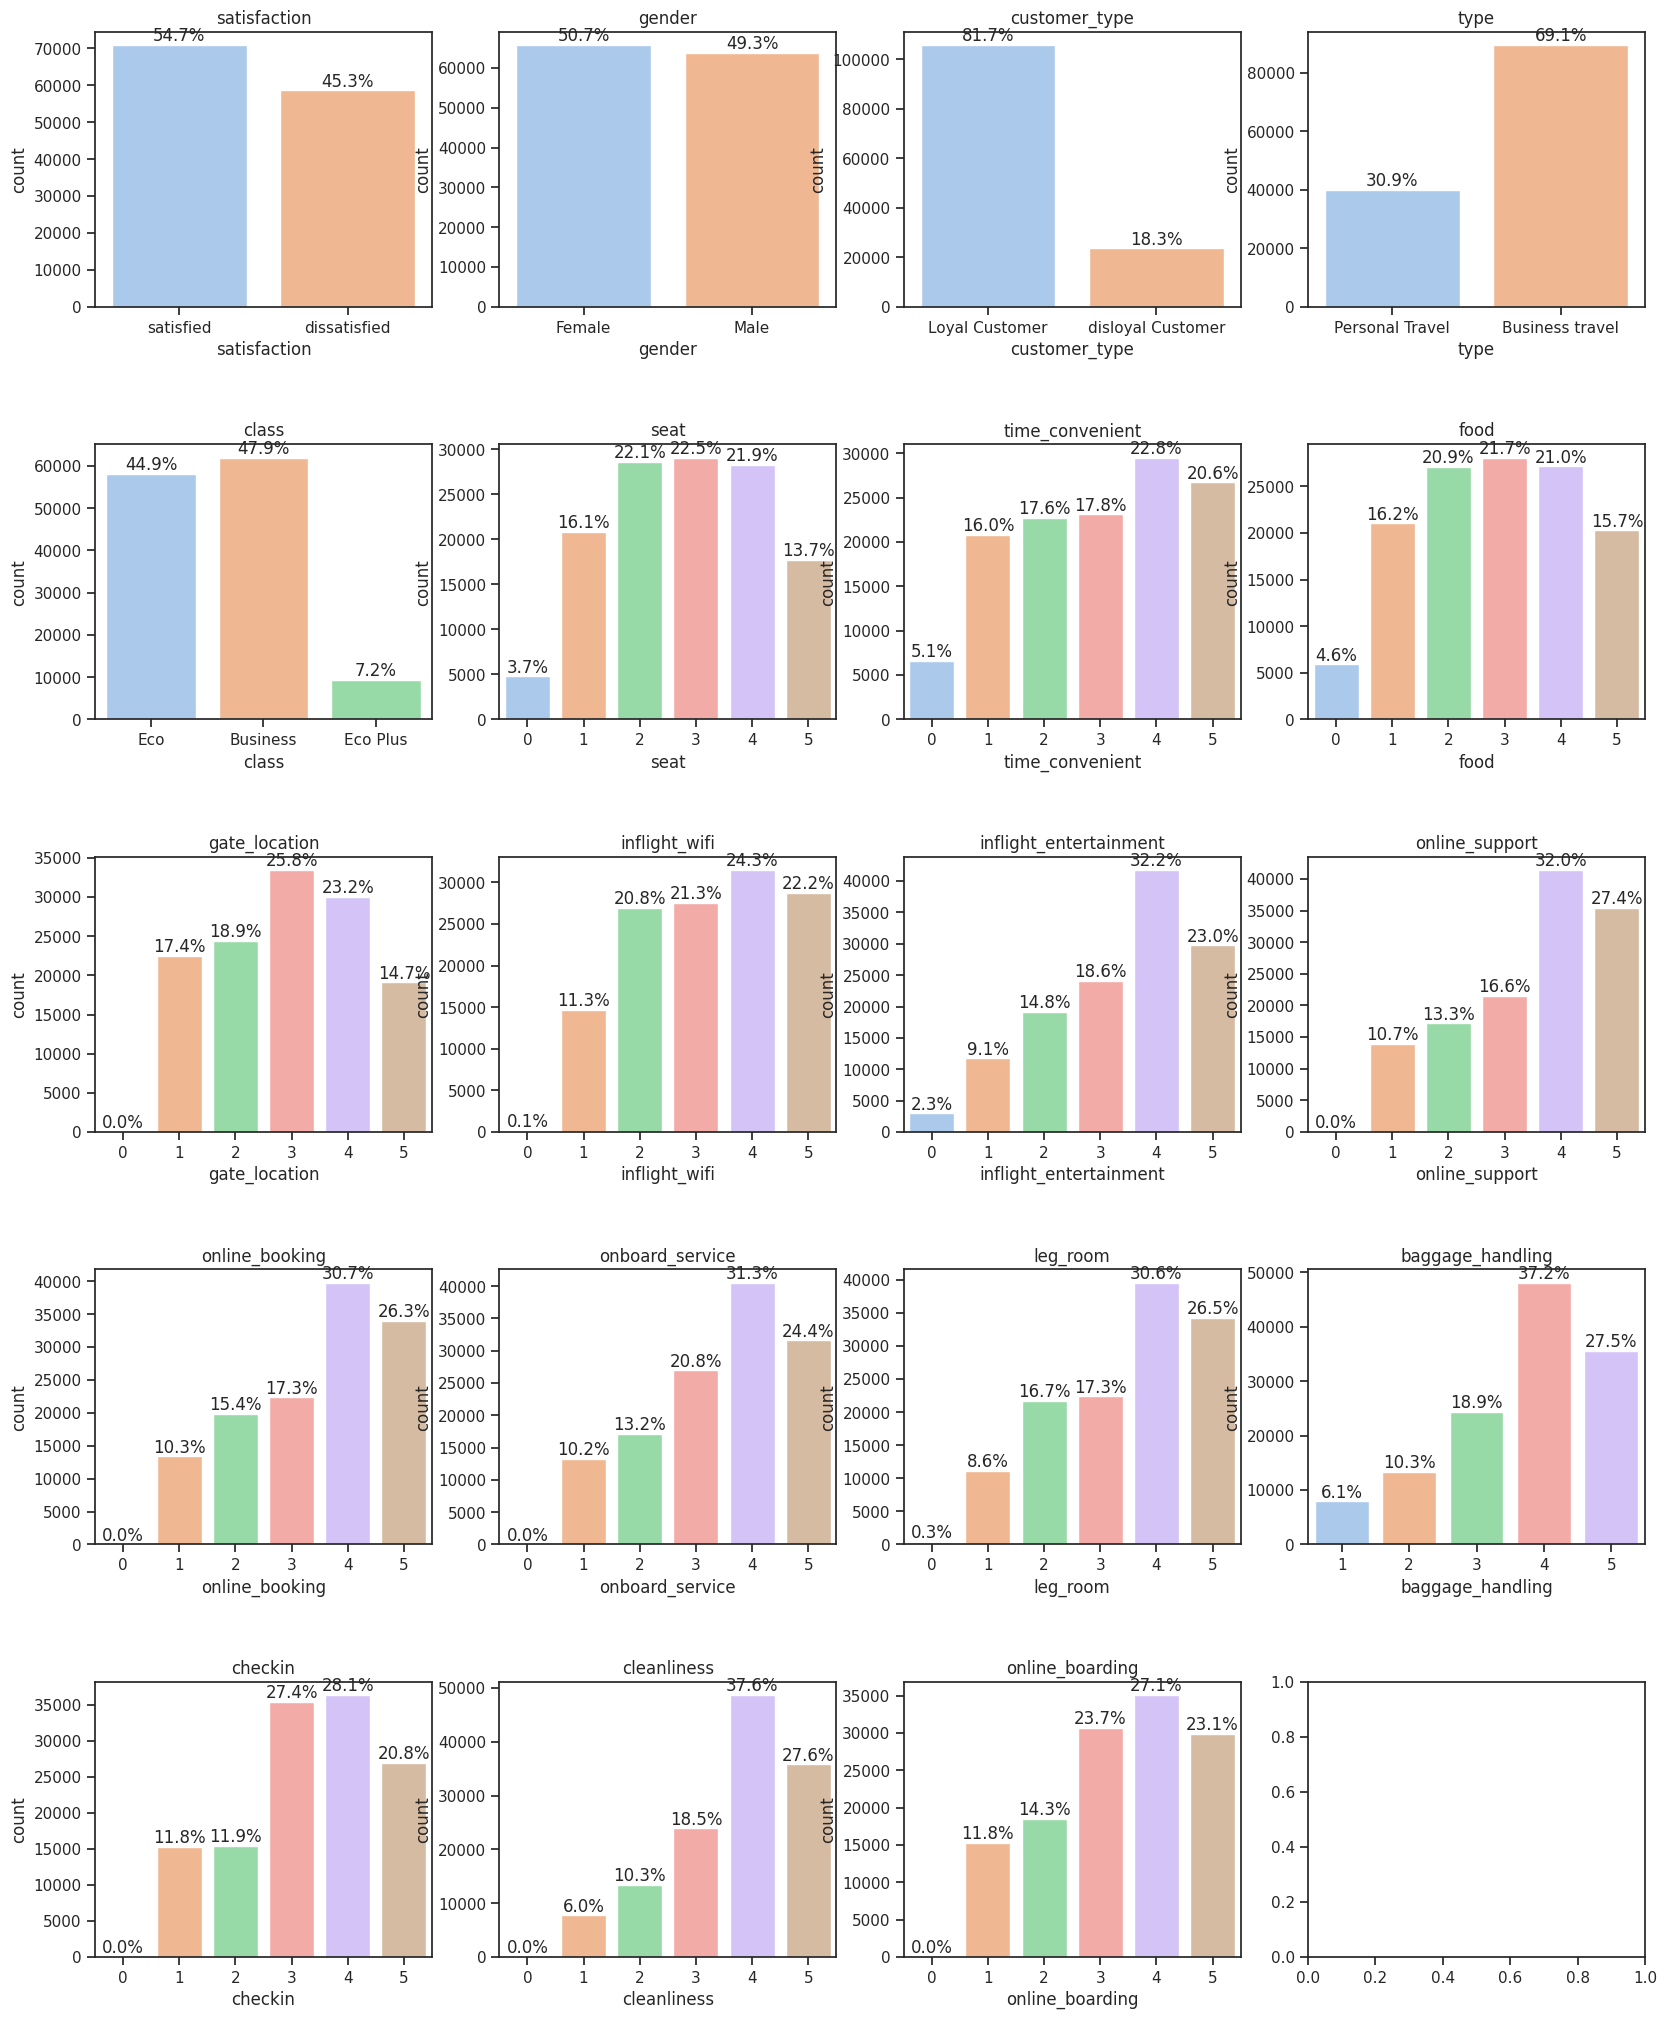

In [ ]:
n_cols = 4
n_rows = (len(cols_cat) + n_cols - 1) // n_cols

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5* n_rows))
fig.subplots_adjust(hspace=0.5)

ax = ax.flatten()

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=df, ax=ax[i], hue=col, palette='pastel', legend=False)
    ax[i].set_title(col)

    total = len(df)

    # Calcular %
    for p in ax[i].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax[i].annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

- **Insight**: Los clientes leales no garantizan satisfacción, lo que sugiere un riesgo oculto de pérdida de clientes valiosos.

### B.2 Variables Numéricas:
* Se observan outliers en departure_delay y arrival_delay.

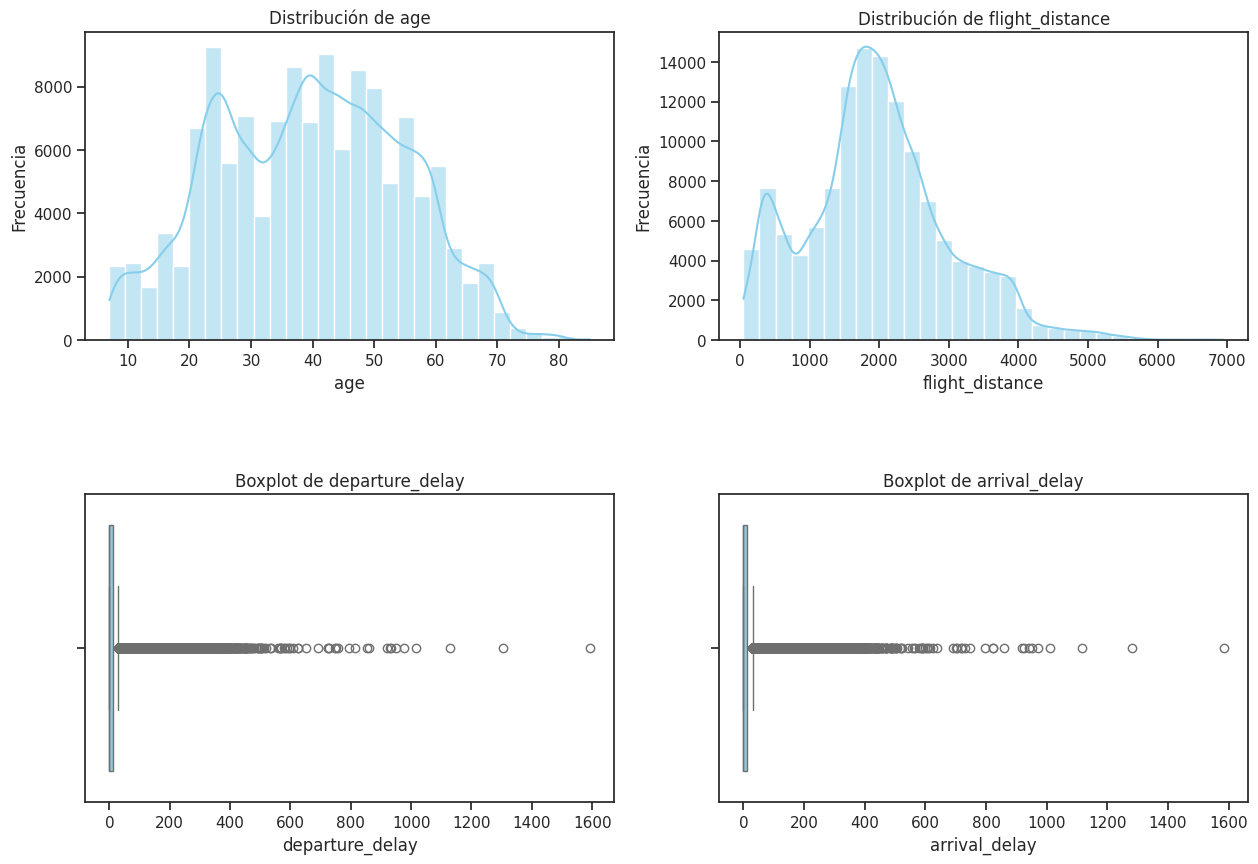

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
ax = ax.flatten()

# Histogramas
for i, col in enumerate(cols_num[:2]):
    sns.histplot(df[col], kde=True, ax=ax[i], color='skyblue', bins=30)
    ax[i].set_title(f'Distribución de {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frecuencia')

# Boxplots (visualizar mejor outliers)
for i, col in enumerate(cols_num[2:]):
    sns.boxplot(x=df[col], ax=ax[i+2], color='skyblue')
    ax[i+2].set_title(f'Boxplot de {col}')
    ax[i+2].set_xlabel(col)

plt.show()

## C. Tratamiento de Outliers
La eliminación de outliers busca evitar que retrasos extremos distorsionen el aprendizaje del modelo, priorizando patrones representativos del comportamiento habitual de los clientes.
En ese sentido, se ha optado por calcular el rango intercuartílico para encontrar y eliminar estos valores.


In [ ]:
# Outliers departure_delay

Q1 = df['departure_delay'].quantile(0.25)
Q3 = df['departure_delay'].quantile(0.75)
IQR = Q3 - Q1

# Límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar outliers
df = df[(df['departure_delay'] >= lower_limit) & (df['departure_delay'] <= upper_limit)]

# ----------------

# Outliers arrival_delay
Q1_2 = df['arrival_delay'].quantile(0.25)
Q3_2 = df['arrival_delay'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2

# Límites inferior y superior
lower_limit2 = Q1_2 - 1.5 * IQR_2
upper_limit2 = Q3_2 + 1.5 * IQR_2

# Identificar outliers
df = df[(df['arrival_delay'] >= lower_limit2) & (df['arrival_delay'] <= upper_limit2)]

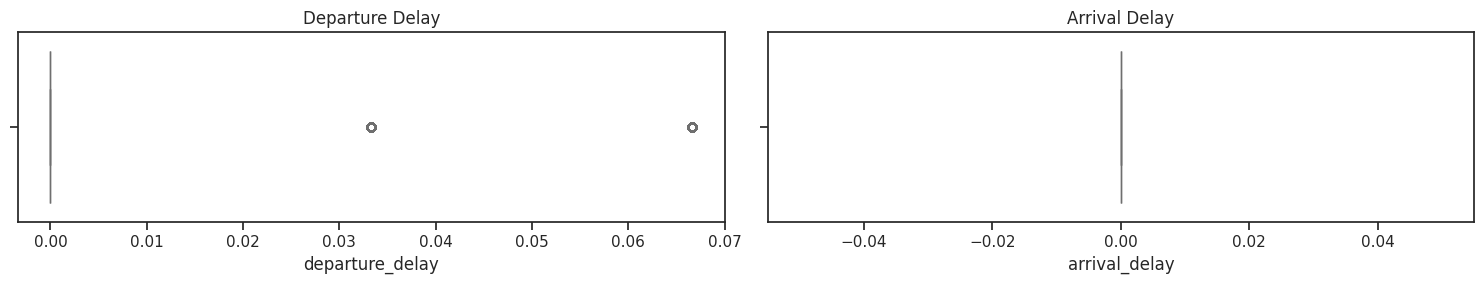

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

# Boxplot: departure_delay
sns.boxplot(data=df, x='departure_delay', ax=ax[0], color='skyblue')
ax[0].set_title('Departure Delay')

# Boxplot: arrival_delay
sns.boxplot(data=df, x='arrival_delay', ax=ax[1], color='skyblue')
ax[1].set_title('Arrival Delay')

plt.tight_layout()
plt.show()

## D. Correlaciones

*  A excepción de departure_delay y arrival_delay, las demás variables no parecen estar relacionadas.

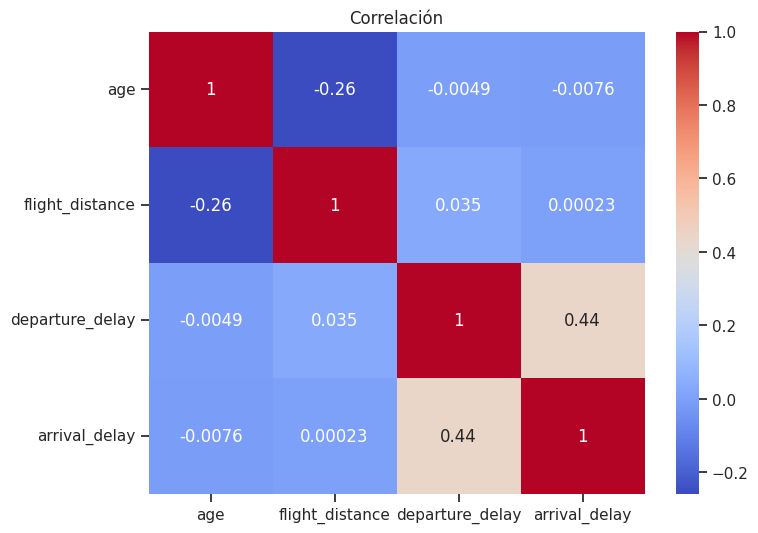

In [ ]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[cols_num].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación')
plt.show()

## E. Relación entre variables y satisfacción
### E.1 Variables categóricas y satisfacción



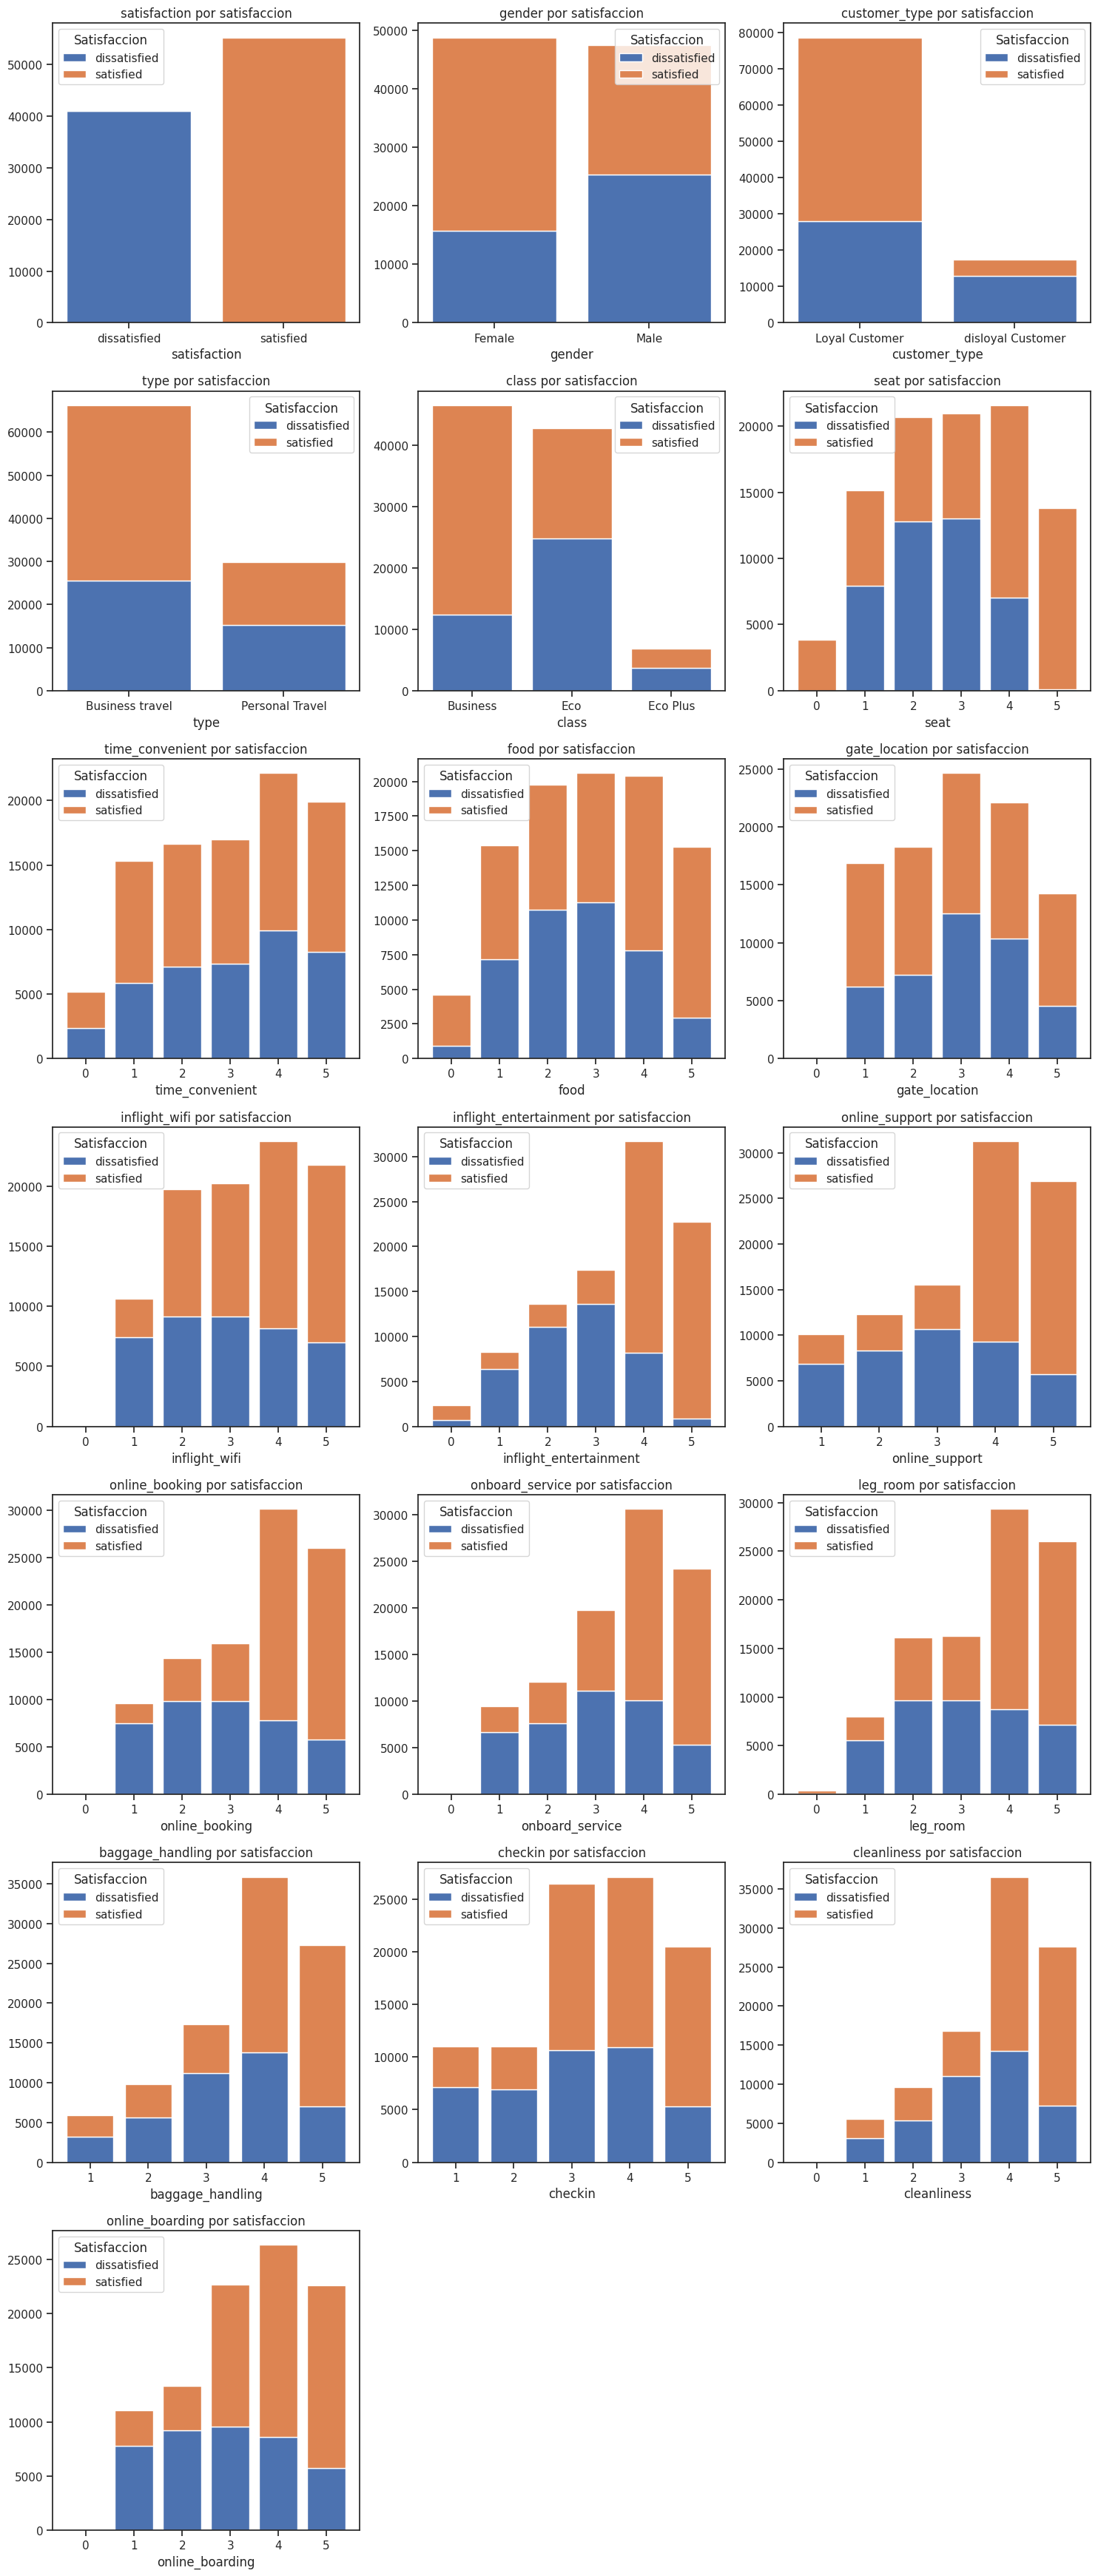

In [ ]:
n_cols = 3
n_rows = (len(cols_cat) // n_cols) + (len(cols_cat) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Columnas categóricas
for idx, col in enumerate(cols_cat):
    grouped = df.groupby([col, 'satisfaction']).size().unstack(fill_value=0)
    # barras apiladas
    bottom = None
    for satisfaction_level in grouped.columns:
        axes[idx].bar(
            grouped.index,
            grouped[satisfaction_level],
            label=satisfaction_level,
            bottom=bottom,
        )
        bottom = (
            grouped[satisfaction_level]
            if bottom is None
            else bottom + grouped[satisfaction_level]
        )

    axes[idx].set_title(f"{col} por satisfaccion")
    axes[idx].set_xlabel(col)
    axes[idx].legend(title="Satisfaccion")

for ax in axes[len(cols_cat):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


* **Customer Type:** Aunque los clientes leales están más satisfechos que los no leales, en el grupo de clientes leales se observa una buena proporción de clientes insatisfechos. Aparentemente la lealtad del cliente está relacionada con la satisfacción.
* **Class:** La clase Eco muestra una gran proporción de insatisfacción, considerando que esta clase representa más del 44% del total, debería evaluarse a mejor detalle.
* **Servicios a bordo (Inflight Entertainment, WiFi, y otros):** Tienen cierta relación positiva con la satisfacción. A medida que la calificación dada por los clientes aumenta, la proporción de satisfacción también crece. Casi la totalidad de clientes que calificaron Inflight Entertainment con la máxima puntuación, están satisfechos.

### E.2 Variables numéricas y satisfacción
#### E.2.1 Edad y satisfacción:
Al parecer, los clientes más jóvenes están más insatisfechos. Evaluar la edad puede ser relevante para mejores predicciones.

<ipython-input-13-cf0c77167614>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="satisfaction", y="age", palette="pastel")


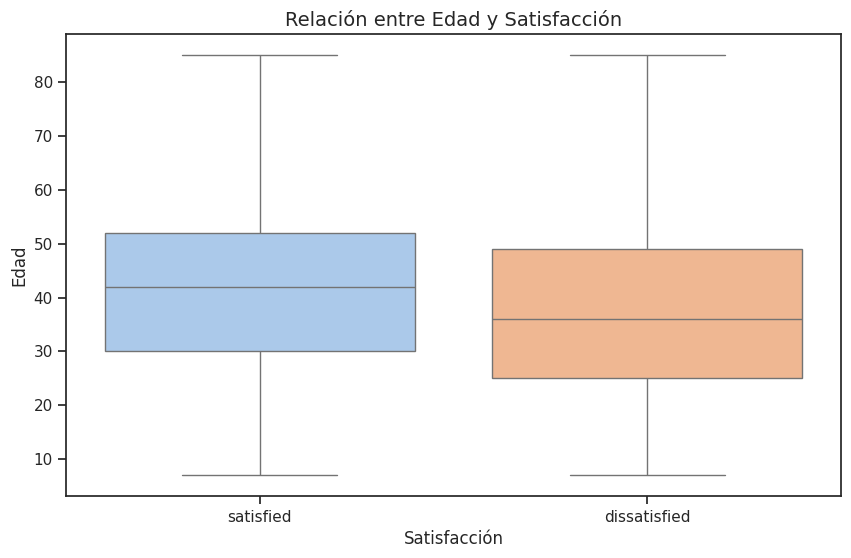

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="satisfaction", y="age", palette="pastel")
plt.title("Relación entre Edad y Satisfacción", fontsize=14)
plt.xlabel("Satisfacción", fontsize=12)
plt.ylabel("Edad", fontsize=12)
plt.show()

#### E.2.2 Distancia del vuelo y satisfacción:
Los clientes de vuelos más cortos tienen una mayor satisfacción.
En el rango de distancia de vuelo más habitual (1000 a 2500), los clientes están satisfechos e insatisfechos en similar proporción.  

<ipython-input-14-111a2fbc0dc5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="satisfaction", y="flight_distance", palette="pastel")


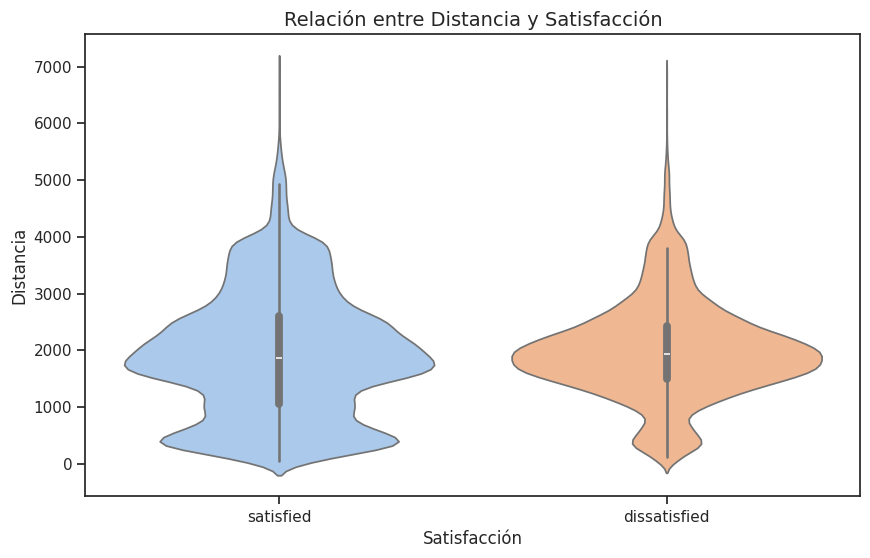

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="satisfaction", y="flight_distance", palette="pastel")
plt.title("Relación entre Distancia y Satisfacción", fontsize=14)
plt.xlabel("Satisfacción", fontsize=12)
plt.ylabel("Distancia", fontsize=12)
plt.show()

#### E.2.3 Retraso del vuelo (departure_delay) y satisfacción
Los clientes insatisfechos tienen un retraso levemente mayor que los clientes satisfechos. Sin embargo, para vuelos sin retraso, la proporción de clientes satisfechos e insatisfechos es similar.

<ipython-input-15-fbf59eba3dde>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="satisfaction", y="arrival_delay", palette="pastel")


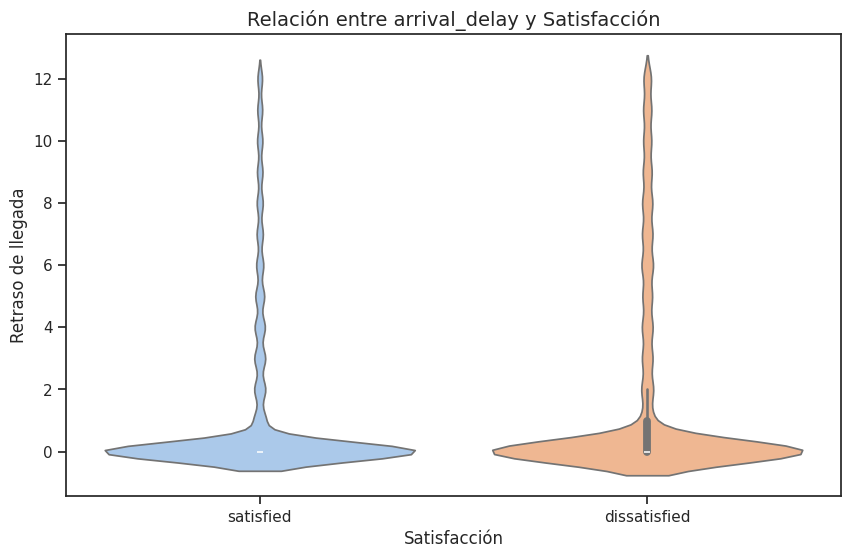

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="satisfaction", y="arrival_delay", palette="pastel")
plt.title("Relación entre arrival_delay y Satisfacción", fontsize=14)
plt.xlabel("Satisfacción", fontsize=12)
plt.ylabel("Retraso de llegada", fontsize=12)
plt.show()

## F. Preprocesamiento de datos
### F.1 Codificación de variables categóricas
Para simplificar el modelo y mantener interpretabilidad, se utilizó Label Encoding. En un escenario productivo, podría evaluarse One-Hot Encoding para variables sin orden implícito.

In [ ]:
df.head()

,satisfaction,gender,customer_type,age,type,class,flight_distance,seat,time_convenient,food,...,online_support,online_booking,onboard_service,leg_room,baggage_handling,checkin,cleanliness,online_boarding,departure_delay,arrival_delay
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0


In [ ]:
class_mapping = {'Eco': 1, 'Eco Plus': 2, 'Business': 3}
df['class'] = df['class'].replace(class_mapping)

class_mapping2 = {'dissatisfied': 0, 'satisfied': 1}
df['satisfaction'] = df['satisfaction'].replace(class_mapping2)

categorical_vars = ['gender', 'customer_type', 'type']
# gender: female (0) | male (1)
# customer_type: Loyal Customer (0) | DisLoyal Customer (1)
# type: Bussines Travel (0) | Personal Travel (1)
label_encoders = {}

for var in categorical_vars:
    le = LabelEncoder()
    df[var] = le.fit_transform(df[var])
    label_encoders[var] = le
    print(f"Label Encoder para {var}: {le.classes_}")

Label Encoder para gender: [0 1]
Label Encoder para customer_type: [0 1]
Label Encoder para type: [0 1]


In [ ]:
df.head()

,satisfaction,gender,customer_type,age,type,class,flight_distance,seat,time_convenient,food,...,online_support,online_booking,onboard_service,leg_room,baggage_handling,checkin,cleanliness,online_boarding,departure_delay,arrival_delay
0,1,0,0,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
2,1,0,0,15,1,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,1,1,0,30,1,1,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0


### F.2. Normalización de las variables numéricas
Las variables numéricas se normalizan para evitar que los valores más altos tengan un impacto desproporcionado en los cálculos del modelo. Aunque las demás variables son categóricas (binarias o calificaciones del 1 al 5), estas no requieren normalización.

En nuestro caso, este paso no es estrictamente necesario ya que terminamos usando algoritmos basados en árboles (como Decision Trees y Random Forest), que no se ven afectados por las escalas de las variables. Sin embargo, consideramos que este paso puede ser útil si se decide probar otros modelos en el futuro.

In [ ]:
scaler = MinMaxScaler()
df[cols_num] = scaler.fit_transform(df[cols_num])

### F.3. Dividir dataset en train, validation y test

In [ ]:
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

In [ ]:
y.value_counts()

,count
satisfaction,
1,37197
0,26425


In [ ]:
x_main, x_test, y_main, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)
x_train, x_val, y_train, y_val= train_test_split(x_main,y_main,test_size=0.25, stratify=y_main, random_state=42)

### F.3. Baseline
Para establecer un punto de referencia (baseline) y poder evaluar la efectividad del modelo, utilizamos un clasificador base simple. Esto nos da un valor inicial de accuracy de 0.57, lo cual representa el rendimiento mínimo que cualquier modelo debería superar para ser considerado efectivo.

In [ ]:
# Clasificador dummy
baseline_model = DummyClassifier(strategy='most_frequent', random_state=42)
baseline_model.fit(x_train, y_train)

y_pred_baseline = baseline_model.predict(x_test)
print('Accuracy del baseline:', accuracy_score(y_test, y_pred_baseline))

Accuracy del baseline: 0.574312022056911


## 3. Entrenamiento del modelo
### Entrenamiento inicial de modelos

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
}

for model_name, model in models.items():
    print(f"{model_name}...")

    # Entrenar modelo
    model.fit(x_train, y_train)

    # Validación
    y_val_pred = model.predict(x_val)
    print(f"Clasificación en Validación para {model_name}:")
    print(classification_report(y_val, y_val_pred))
    print("-" * 50)


Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Clasificación en Validación para Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      8183
           1       0.85      0.86      0.85     11039

    accuracy                           0.83     19222
   macro avg       0.83      0.83      0.83     19222
weighted avg       0.83      0.83      0.83     19222

--------------------------------------------------
Decision Tree...
Clasificación en Validación para Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8183
           1       0.94      0.94      0.94     11039

    accuracy                           0.93     19222
   macro avg       0.93      0.93      0.93     19222
weighted avg       0.93      0.93      0.93     19222

--------------------------------------------------
Random Forest...
Clasificación en Validación para Random Forest:
              precision    recall  f1-score   support

     

Nos quedamos con los 2 modelos con mayor accuracy, para ajustarlos y tratar de obtener un mejor resultado.

### Ajuste Decision Tree


In [ ]:
# Modelo
tree = DecisionTreeClassifier(random_state=42)

# Hiperparámetros

parametros = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [10, 20, 40],
    'min_samples_leaf': [10, 50, 100],
    'max_features': [None, 'sqrt', 'log2']
}

# búsqueda de hiperparámetros con GridSearchCV
grid_search_dt = GridSearchCV(estimator=tree, param_grid=parametros, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(x_train, y_train)

print(f"Mejores parámetros usando Decision Tree: {grid_search_dt.best_params_}")

Mejores parámetros usando Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 40}


In [ ]:
# Evaluar el modelo optimizado en el set de validación
best_dt_model = grid_search_dt.best_estimator_
y_val_pred_dt = best_dt_model.predict(x_val)
print("Resultado con ajuste de parámetros (Decision Tree):")
print(classification_report(y_val, y_val_pred_dt))

Resultado con ajuste de parámetros (Decision Tree):
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      8183
           1       0.95      0.94      0.94     11039

    accuracy                           0.94     19222
   macro avg       0.93      0.94      0.94     19222
weighted avg       0.94      0.94      0.94     19222



In [ ]:
print('\nMatriz de Confusión:')
print(confusion_matrix(y_val, y_val_pred_dt))


Matriz de Confusión:
[[ 7631   552]
 [  662 10377]]


* Accuracy: El 94% de clientes (validation) han sido clasificados correctamente.
* Recall: El modelo identifica correctamente al 93% de los clientes insatisfechos entre todos los clientes insatisfechos reales.

### Ajuste de Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)

parametros_rf = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [20, 40],
}

# búsqueda
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=parametros_rf,
    cv=3,  # Validación cruzada
    scoring='accuracy',  # Optimizar recall (insatisfechos)
    n_jobs=-1,
    verbose=3
)

# Entrenar
grid_search.fit(x_train, y_train)
print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 100}


In [ ]:
# Evaluar el modelo con el conjunto de validación
best_rf = grid_search.best_estimator_
y_pred_val = best_rf.predict(x_val)

# Reporte de clasificación en validación
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      8183
           1       0.93      0.94      0.94     11039

    accuracy                           0.93     19222
   macro avg       0.93      0.92      0.92     19222
weighted avg       0.93      0.93      0.93     19222



* Accuracy: El 93% de clientes (validation) han sido clasificados correctamente.
* Recall: El modelo identifica correctamente al 91% de los clientes insatisfechos entre todos los clientes insatisfechos reales.

## 4. Evaluación de modelos

Ambos modelos (DecisionTreeClassifier y RandomForestClassifier) presentan un buen desempeño, con un AUC-ROC elevado que indica una buena capacidad para clasificar clientes satisfechos e insatisfechos.

Al analizar las métricas a mayor detalle, nos percatamos que el modelo de Random Forest logra un AUC-ROC ligeramente superior que el árbol de decisión (0.99 frente a 0.98), pero su recall para la clase de clientes insatisfechos (91%) es ligeramente inferior al del modelo Decision Tree (93%).
Desde una perspectiva de negocio, un falso negativo implica no detectar a un cliente insatisfecho, perdiendo la oportunidad de intervenir a tiempo. Por este motivo, se priorizó el recall de la clase "insatisfecho".

Adicionalmente, el árbol de decisión es un modelo más sencillo y menos costoso en términos computacionales, lo que lo hace más práctico para implementaciones rápidas o contar con recursos más limitados.

En consecuencia, aunque ambos modelos ofrecen buenos resultados, consideramos que el árbol de decisión podría ser la mejor opción para resolver nuestro problema. Sobretodo si se cuenta con recursos limitados y se requiere de un modelo más simple, fácil de entender, pero efectivo al identificar correctamente clientes insatisfechos.

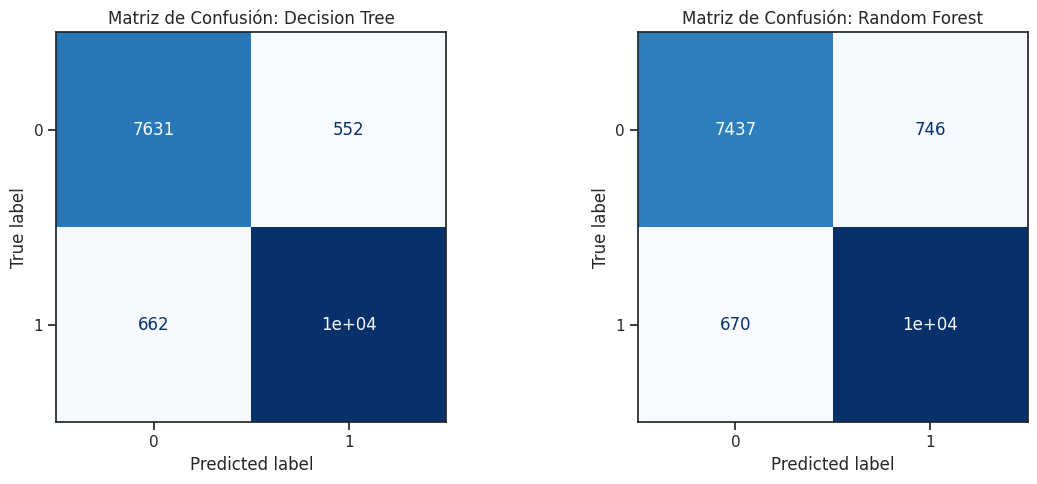

In [ ]:
models = {
    "Decision Tree": best_dt_model,
    "Random Forest": best_rf
}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, (name, model) in zip(axes, models.items()):
    # Predecir en el conjunto de validación
    y_pred = model.predict(x_val)

    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
    ax.set_title(f"Matriz de Confusión: {name}")

plt.tight_layout()
plt.show()


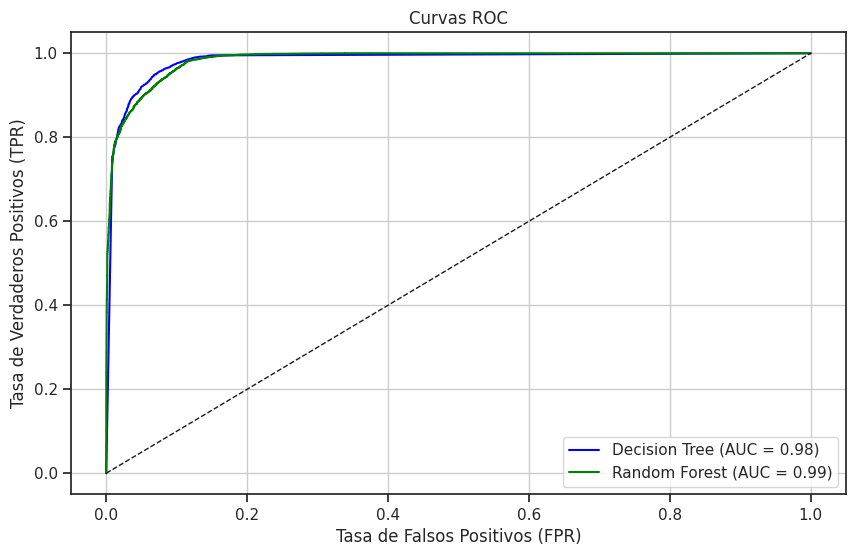

Decision Tree Metrics for Class 0:
Confusion Matrix:
[[ 7631   552]
 [  662 10377]]
Precision: 0.92
Recall: 0.93
F1-Score: 0.93
AUC-ROC: 0.98

Random Forest Metrics for Class 0:
Confusion Matrix:
[[ 7437   746]
 [  670 10369]]
Precision: 0.92
Recall: 0.91
F1-Score: 0.91
AUC-ROC: 0.99



In [ ]:

# Probabilidades de predicción
y_val_proba_dt = best_dt_model.predict_proba(x_val)[:, 0]  # Clase 0
y_val_proba_rf = best_rf.predict_proba(x_val)[:, 0]        # Clase 0

# Curva ROC para Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_val, y_val_proba_dt, pos_label=0)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Curva ROC para Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_val_proba_rf, pos_label=0)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Gráfica de Curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', lw=1)  # Línea diagonal
plt.title('Curvas ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Métricas adicionales
def calculate_metrics(model_name, y_true, y_pred, y_proba, target_class):
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=target_class)
    recall = recall_score(y_true, y_pred, pos_label=target_class)
    f1 = f1_score(y_true, y_pred, pos_label=target_class)
    roc_auc = auc(*roc_curve(y_true, y_proba, pos_label=target_class)[:2])
    print(f"{model_name} Metrics for Class {target_class}:")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"AUC-ROC: {roc_auc:.2f}\n")

calculate_metrics("Decision Tree", y_val, best_dt_model.predict(x_val), y_val_proba_dt, target_class=0)
calculate_metrics("Random Forest", y_val, best_rf.predict(x_val), y_val_proba_rf, target_class=0)


# 5. Refinamiento y Despliegue
Para evaluar el modelo seleccionado, se usa el conjunto de test para medir el desempeño en datos completamente nuevos, que no se utilizaron durante el entrenamiento ni la validación.

Esto permitirá analizar la capacidad para generalizar del modelo y confirmar si cumple con los objetivos planteados. Dado que el problema se centra en identificar clientes insatisfechos, se prioriza métricas como el recall de la clase 0, asegurando que la mayoría de los clientes insatisfechos sean correctamente identificados.


Resultados en el conjunto de prueba (Decision Tree):
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      8183
           1       0.95      0.94      0.94     11040

    accuracy                           0.94     19223
   macro avg       0.94      0.94      0.94     19223
weighted avg       0.94      0.94      0.94     19223



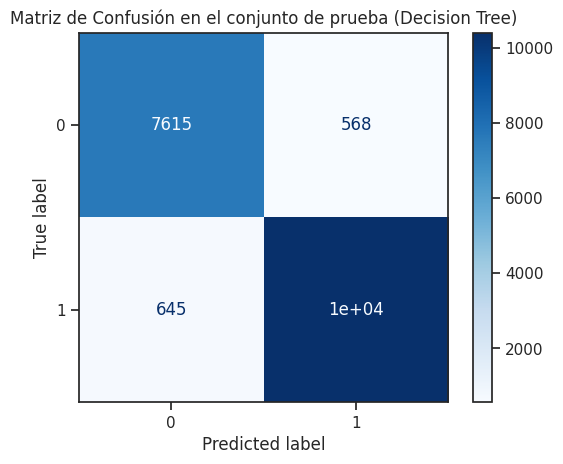

In [ ]:
y_test_pred = best_dt_model.predict(x_test)
y_test_proba = best_dt_model.predict_proba(x_test)[:, 0] #clase 0

print("Resultados en el conjunto de prueba (Decision Tree):")
print(classification_report(y_test, y_test_pred))

# Matriz de confusión
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_dt_model.classes_)
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión en el conjunto de prueba (Decision Tree)")
plt.show()


## 6. Resultados

El modelo presenta un recall sólido para la clase 0 (clientes insatisfechos), lo cual es clave para este problema, ya que nos permite identificar a la mayoría de estos clientes para tomar medidas correctivas y comunicaciones personalizadas para este segmentos de clientes.

Para complementar este análisis, identificamos las características que más influyen en la predicción del modelo, que es útil para comprender qué factores afectan la satisfacción de los clientes.

            Característica  Importancia
11  inflight_entertainment     0.350847
6                     seat     0.220053
13          online_booking     0.063947
7          time_convenient     0.040340
3                     type     0.039497
14         onboard_service     0.035169
1            customer_type     0.033988
9            gate_location     0.027618
4                    class     0.025268
18             cleanliness     0.023877


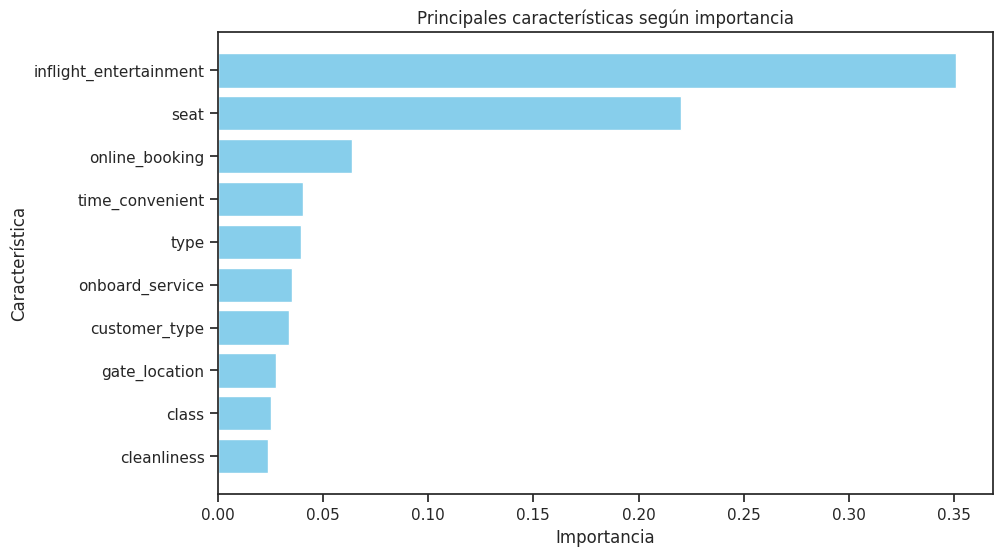

In [ ]:
# Obtener importancia de características
importancias = best_dt_model.feature_importances_
caracteristicas = x_test.columns
importancia_df = pd.DataFrame({
    'Característica': caracteristicas,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

print(importancia_df.head(10))
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Característica'][:10], importancia_df['Importancia'][:10], color='skyblue')
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.title("Principales características según importancia")
plt.gca().invert_yaxis()
plt.show()


Estos valores muestran la importancia de cada característica en la toma de decisiones del modelo.

* Prioridad del entretenimiento y los asientos: Son las dos variables principales que combinadas representan más del 57% de la importancia, lo que sugiere que las mejoras en estas áreas probablemente tendrán un impacto directo en la satisfacción de los clientes.
* Facilidad en medios digitales: Las reservas en línea y la conveniencia de horarios son factores que los clientes valoran.
* Los clientes perciben la experiencia de forma diferentes. La satisfacción varía dependiendo del tipo de cliente, el servicio (clase) contratado y la limpieza.

### Recomendaciones Finales
* Es necesario establecer un ciclo de retroalimentación y actualización constante para mejorar y adaptar el modelo a medida que evolucionan las expectativas y/o gustos de los clientes.
* Actualizar y diversificar las opciones de entretenimiento podría aumentar significativamente la satisfacción general. Esto podría incluir contenido interactivo, acceso a internet o experiencias personalizadas.
* Mejorar la ergonomía y diseño de los asientos para optimizar la comodidad y funcionalidad de los asientos.
* Optimizar la experiencia digital: Mejorar el proceso de reserva online, haciéndolo más intuitivo y rápido, junto con ajustes para facilitar la elección de horarios convenientes.
* Personalizar los servicios según el tipo de cliente y clase puede maximizar la percepción positiva en diferentes segmentos.
